In [1]:
import rosbag
import cv2
import os, re
from sensor_msgs.msg import Image
from cv_bridge import CvBridge
import numpy as np
# conda install libgcc

bag = rosbag.Bag('cloth/test.bag')
t1 = '/yumi/ikSloverVel_controller/state'
t2 = '/yumi/ikSloverVel_controller/ee_cart_position'

topics = bag.get_type_and_topic_info()[1].keys()
t3 = '/camera/image/rgb_611205001943'
t4 = '/camera/image/depth_611205001943'

bridge = CvBridge()

print bag
count = 0
tt_pos = np.array([])
for topic, msg, t in bag.read_messages(topics=[t1,t2,t3,t4]):
    if topic == t3:
        count = count + 1
        cv_img = bridge.imgmsg_to_cv2(msg)
        cv_img = cv2.cvtColor(cv_img,cv2.COLOR_BGR2RGB)
        cv2.imwrite(os.path.join("cloth/rgb/%04i.jpg" % count), cv_img)
    if topic == t4:
        cv_img = bridge.imgmsg_to_cv2(msg)
        cv2.imwrite(os.path.join("cloth/depth/%04i.png" % count), cv_img)
    if topic == t2:
        pos = np.array(msg.data)
        tt_pos = np.vstack((tt_pos, pos)) if tt_pos.size else pos
        

print tt_pos.shape
print count
print tt_pos.shape
import os, cv2
import matplotlib.pyplot as plt
import numpy as np

np.savez('data',pos=tt_pos)

path:        cloth/test.bag
version:     2.0
duration:    53.8s
start:       Jul 27 2017 15:21:55.13 (1501140115.13)
end:         Jul 27 2017 15:22:48.97 (1501140168.97)
size:        2.3 GB
messages:    6460
compression: none [1615/1615 chunks]
types:       sensor_msgs/Image          [060021388200f6f0f447d0fcd9c64743]
             std_msgs/Float64MultiArray [4b7d974086d4060e7db4613a7e6c3ba4]
topics:      /camera/image/depth_611205001943                1614 msgs @ 30.0 Hz : sensor_msgs/Image         
             /camera/image/rgb_611205001943                  1614 msgs @ 30.0 Hz : sensor_msgs/Image         
             /yumi/ikSloverVel_controller/ee_cart_position   1616 msgs @ 30.0 Hz : std_msgs/Float64MultiArray
             /yumi/ikSloverVel_controller/state              1616 msgs @ 30.0 Hz : std_msgs/Float64MultiArray
(1616, 6)
1614
(1616, 6)


In [1]:
import os
import numpy as np
def get_filelist(home_dir):
    filelist = []
    for dirpath, dirnames, filenames in os.walk(home_dir):
        for filename in filenames:
            fn = os.path.join(dirpath,filename)
            filelist.append(fn)
    filelist = sorted(filelist)
    return filelist

depthlist = get_filelist('cloth/depth')
rgblist = get_filelist('cloth/rgb')



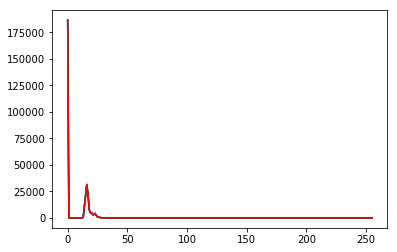

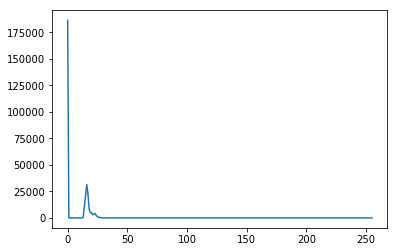

In [24]:
import cv2
import matplotlib.pyplot as plt

i = 1
depth = cv2.imread(depthlist[i])

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([depth],[i],None,[256],[0,256])
    plt.plot(histr,color = col)

plt.show()

gray = cv2.cvtColor(depth,cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()


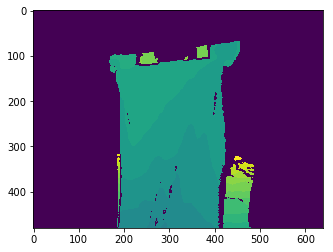

In [31]:
import cv2
import matplotlib.pyplot as plt
def get_fg(img):
    markers = np.uint8(np.zeros((480,640)))
    markers[420:, 280:360] =1
    # set background as 2
    markers[:,0:20] = 2
    markers[:,-20:] = 2
    markers[0:20,:] = 2
    markers_rgb = markers.astype(np.int32)
    markers_rgb = cv2.watershed(img,markers_rgb)
    fg = np.uint8(markers_rgb == 1)
    return fg

i = 1
depth = cv2.imread(depthlist[i])
gray = cv2.cvtColor(depth,cv2.COLOR_BGR2GRAY)
rgb = cv2.imread(rgblist[i])
fg = get_fg(rgb)

gray = cv2.bitwise_and(gray,gray,mask = fg)
plt.imshow(gray)
plt.show()


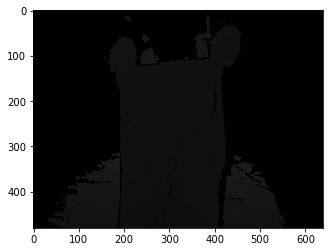

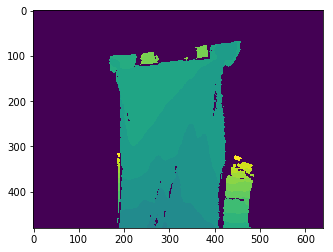

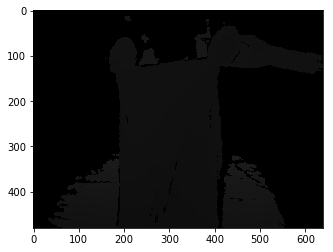

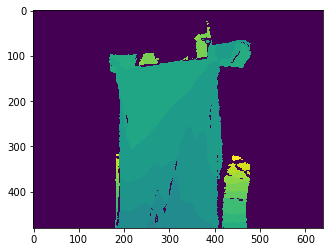

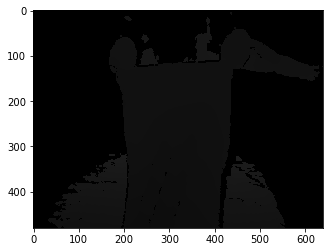

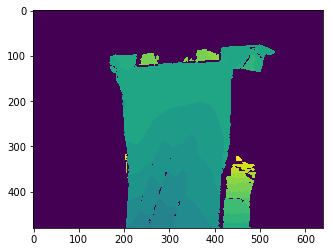

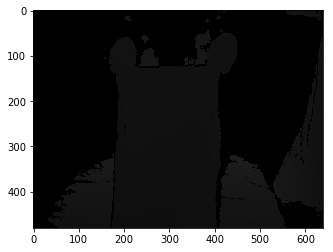

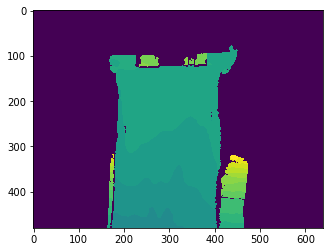

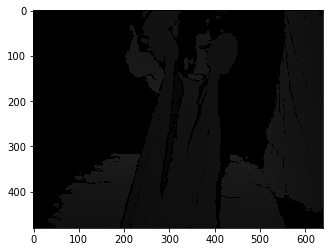

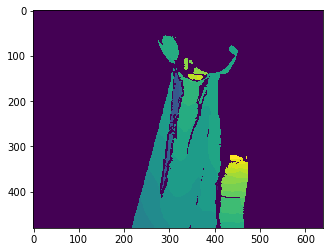

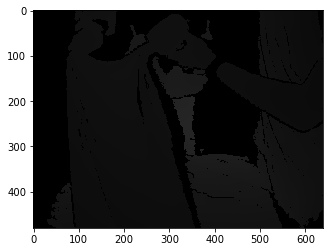

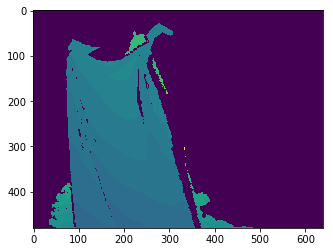

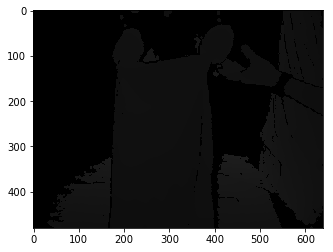

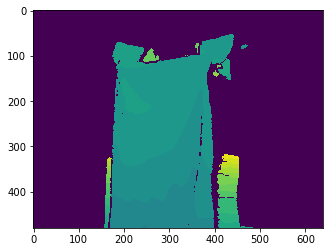

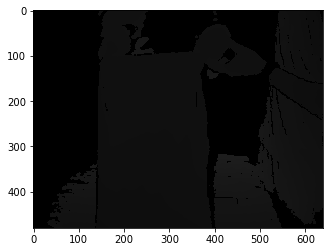

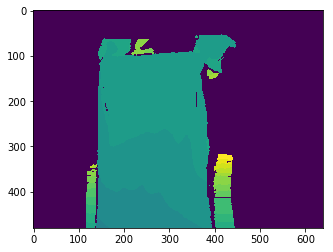

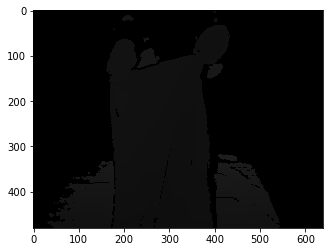

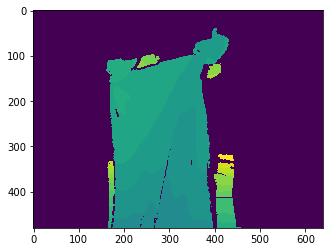

In [46]:
i = 1
def get_fg(img):
    markers = np.uint8(np.zeros((480,640)))
    markers[420:, 280:360] =1
    # set background as 2
    markers[:,0:20] = 2
    markers[:,-20:] = 2
    markers[0:20,:] = 2
    markers_rgb = markers.astype(np.int32)
    markers_rgb = cv2.watershed(img,markers_rgb)
    fg = np.uint8(markers_rgb == 1)
    return fg

def mk(s):#morph kernel
    return np.ones((s,s),np.uint8)

def shrink(fg):
    shrink_fg = cv2.erode(fg, mk(15), iterations = 2)
    return shrink_fg

for i in range(0,len(depthlist),200):
    depth = cv2.imread(depthlist[i])
    plt.imshow(depth), plt.show()
    rgb = cv2.imread(rgblist[i])
    fg = get_fg(rgb)
    #fg = shrink(fg)
    gray = cv2.cvtColor(depth,cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_and(gray,gray,mask = fg)
    plt.imshow(gray)
    plt.show()
